In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv('C:\\Users\\admin\\Downloads\\archive (8)\\diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.isin(['?']).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age 

In [6]:
df = df.replace('?',np.nan) #replaces ? with NaN


In [7]:
#df.replace(0,np.nan,inplace=True) #Replace all zero with nan


In [8]:
#df.fillna(df.mean(),inplace=True) #Replaces all Nan Values with its mean


In [9]:
df.duplicated().sum()

0

In [10]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [47]:
print("Dataset Length:: ",len(df))
print("Data Shape::",df.shape) #768 lines and 9 columns

Dataset Length::  768
Data Shape:: (768, 9)


<AxesSubplot: ylabel='count'>

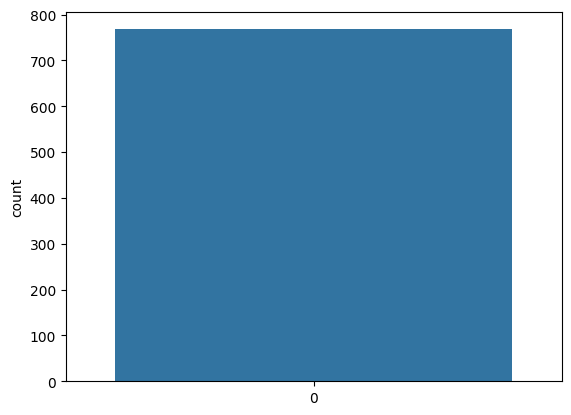

In [11]:
sns.countplot(df['Outcome'])

In [21]:
X = df.drop('Outcome',axis=1)
y=df.Outcome

In [22]:
import matplotlib.pyplot as plt

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


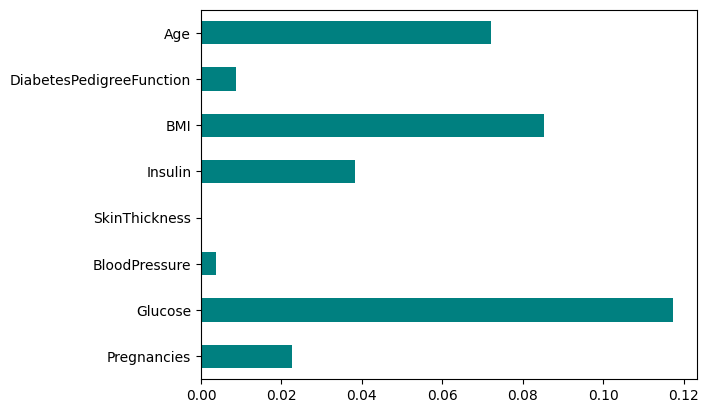

In [23]:
print(X)
from sklearn.feature_selection import mutual_info_classif
importance=mutual_info_classif(X,y)
imp_feat=pd.Series(importance,df.columns[0:len(df.columns)-1])
imp_feat.plot(kind="barh",color="teal")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Xtrain_tf = scaler.fit_transform(X_train)

In [31]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(80,), activation='relu',solver='adam',
 max_iter=100,verbose=True)
mlp.fit(Xtrain_tf,y_train)

Iteration 1, loss = 0.69707367
Iteration 2, loss = 0.67761656
Iteration 3, loss = 0.65921884
Iteration 4, loss = 0.64247525
Iteration 5, loss = 0.62673696
Iteration 6, loss = 0.61261677
Iteration 7, loss = 0.59932971
Iteration 8, loss = 0.58776626
Iteration 9, loss = 0.57631637
Iteration 10, loss = 0.56657112
Iteration 11, loss = 0.55758544
Iteration 12, loss = 0.54911793
Iteration 13, loss = 0.54140178
Iteration 14, loss = 0.53435528
Iteration 15, loss = 0.52777576
Iteration 16, loss = 0.52158377
Iteration 17, loss = 0.51604992
Iteration 18, loss = 0.51068988
Iteration 19, loss = 0.50564847
Iteration 20, loss = 0.50118967
Iteration 21, loss = 0.49684643
Iteration 22, loss = 0.49257101
Iteration 23, loss = 0.48899239
Iteration 24, loss = 0.48508615
Iteration 25, loss = 0.48178668
Iteration 26, loss = 0.47844775
Iteration 27, loss = 0.47547611
Iteration 28, loss = 0.47243686
Iteration 29, loss = 0.46965647
Iteration 30, loss = 0.46697134
Iteration 31, loss = 0.46433400
Iteration 32, los

C:\Users\admin\OneDrive\Documents\ana1\envs\IS_2_LAB_Musaddique\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(80,), max_iter=100, verbose=True)

In [32]:
mlp.score(Xtrain_tf,y_train)


0.8073929961089494

In [33]:
Xtest_tf = scaler.transform(X_test)

In [35]:
mlp.score(Xtest_tf,y_test)

0.7480314960629921

In [36]:
y_pred = mlp.predict(Xtest_tf)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)


In [39]:
print(cm)

[[138  30]
 [ 34  52]]


In [40]:
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       168
           1       0.63      0.60      0.62        86

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.72       254
weighted avg       0.75      0.75      0.75       254



In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [42]:
>>> from sklearn import tree
>>> X = [[0, 0], [1, 1]]
>>> Y = [0, 1]
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X, Y)


[Text(0.5, 0.75, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

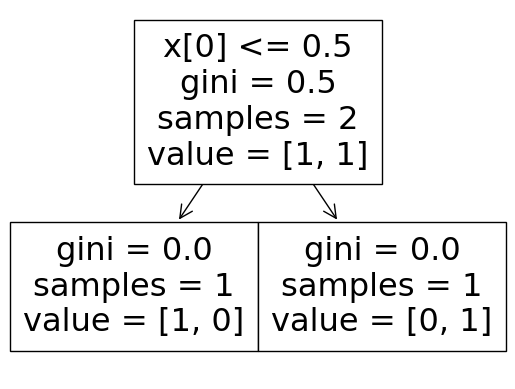

In [43]:
tree.plot_tree(clf)
